# Tutorial week 4 Answers

# Setup

In [1]:
import sys
# Python 3.8 is required
assert sys.version_info >= (3, 8)

import cv2 as cv
import numpy as np
from utils import display_images
import matplotlib.pyplot as plt

# Make sure that optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)
    
cv.useOptimized()

True

In [2]:
# Lets define the point operator function (multiplication, addition, subtraction and division)
def point_op(img, alpha, beta):
    """Point operator function
    Argument:
    ---
    img: input image
    alpha: coefficient
    beta: bias
    
    Returns:
    ---
    Unsigned 8-bit image array"""
    img = img.astype(np.float32)
    res = alpha * img + beta
    # clip the pixel values 
    res = np.clip(res, 0, 255)
    return np.uint8(res)

## Weekly activity
1. Create a **random noise color and grayscale** image. You can set your own width and height, but keep the total number of pixels of both images identical.
2. Convert the code chunk found under section <a href="#Section1">Divide an image into smaller patches using cropping</a> into a function with the following signature:
```python
crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color)
 # img is the source image
 # num_horizontal_grid and num_vertical_grid are the number of patches along x and y axes.
 # line_color is the color of the grid line.
 # The output of the function should be image with grids
```
3. How would you *change the brightness* of a **color image**? Suggest **two ways** to perform the image processing operations. Implement your methods by providing the example codes. You are free to choose any image.
4. Provide at least one common use cases for the following color spaces:
    - RGB
    - HSV
    - CIELAB

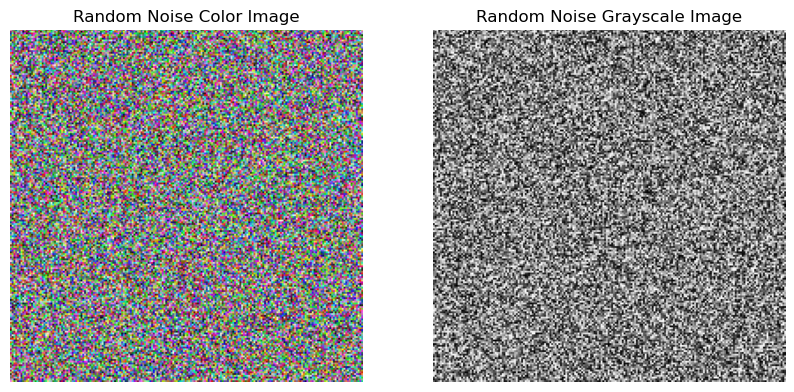

In [3]:
#Q1
width_color, height_color = 200, 200  
width_gray, height_gray = 200, 200    

# Create random noise color image
color_image = np.random.rand(height_color, width_color, 3)

# Create random noise grayscale image
gray_image = np.random.rand(height_gray, width_gray)


fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(color_image)
axs[0].set_title('Random Noise Color Image')
axs[0].axis('off')

axs[1].imshow(gray_image, cmap='gray')
axs[1].set_title('Random Noise Grayscale Image')
axs[1].axis('off')

plt.show()

In [4]:
def crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color):
    img_copy = img.copy()

    height, width = img.shape[:2]
    M, N = int(height / num_vertical_grid), int(width / num_horizontal_grid)

    for y in range(0, height, M):
        for x in range(0, width, N):
            y1 = y + M
            x1 = x + N

            if x1 >= width and y1 >= height:
                x1 = width - 1
                y1 = height - 1
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)

            elif y1 >= height:
                y1 = height - 1
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)

            elif x1 >= width:
                x1 = width - 1
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)

            else:
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)

    return img_copy

# Example usage:
img = cv.imread('images/dog.jfif')
line_color = (0, 255, 0)  # Green color for the grid lines
num_horizontal_grid = 3
num_vertical_grid = 2

result_img = crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color)

cv.imshow('Patched Image', result_img)
cv.waitKey(0)
cv.destroyAllWindows()


In [11]:
#Q3 method 1
img = cv.imread("images/camera.jpg")
alpha = 2
beta = 0
res = point_op(img, alpha, beta)
display_images([img, res], ("original", f"alpha={alpha}, beta={beta}"))

In [12]:
#Method 2 Using HSV
def change_brightness(img, brightness_factor):
    hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
    
    h, s, v = cv.split(hsv)
    
    v = np.clip(v * brightness_factor, 0, 255).astype(np.uint8)
    
    hsv = cv.merge([h, s, v])
    
    img_bright = cv.cvtColor(hsv, cv.COLOR_HSV2BGR)
    
    return img_bright

# Example usage:
img = cv.imread('images/dog.jfif')
brightness_factor = 1.5  # Increase brightness by 50%

result_img = change_brightness(img, brightness_factor)

# Display the result
cv.imshow('Original Image', img)
cv.imshow('Brightened Image', result_img)
cv.waitKey(0)
cv.destroyAllWindows()

# Question4

RGB (Red, Green, Blue)：Display Screens and TVs

HSV (Hue, Saturation, Value)：Image Processing and Computer Vision

CIELAB：Printing, textile manufacturing, and paint production. 